In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


<h1>Análisis Exploratorio de los Datos</h1>

In [3]:
# Importar bibliotecas <h1></h1>
import numpy as np
import pandas as pd
import seaborn as sns # Creación de gráficas y visualización de datos
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
# Cargue de data
file_path = r"./Titanic-Dataset.csv"
# Preprocesamiento de datos
# Convertir los datos en un DataFrame
df = pd.read_csv(file_path)
df.info()  # Para ver los tipos de datos y valores faltantes
df.describe()  # Resumen estadístico
df.head()  # Visualizar las primeras filas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


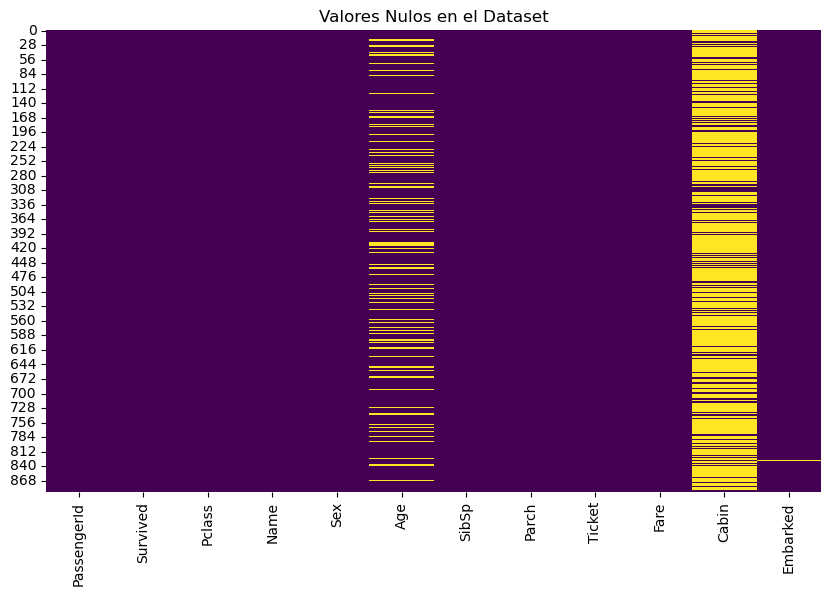

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Limpieza de Datos
# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el Dataset')
plt.show()
df.isnull().sum()  # Para ver la cantidad de valores nulos


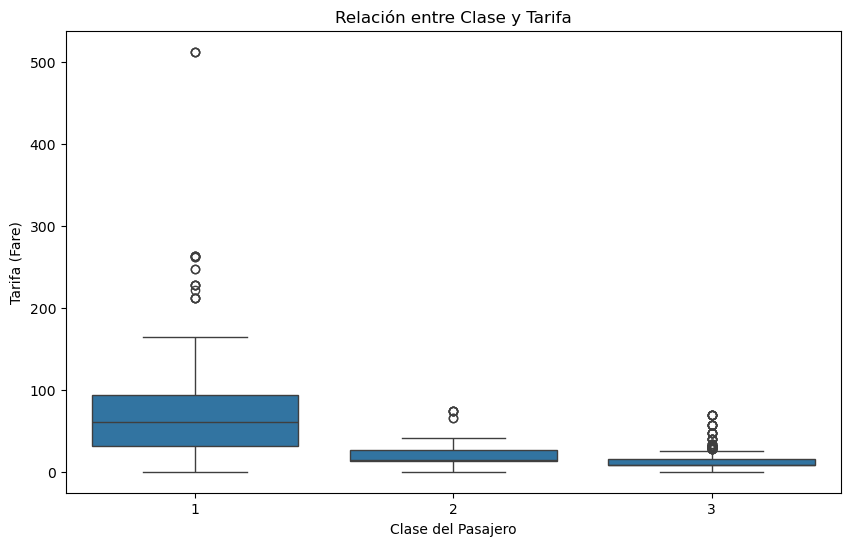

In [10]:
# Relación entre la clase del pasajero y la tarifa
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Relación entre Clase y Tarifa")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Tarifa (Fare)")
plt.show()

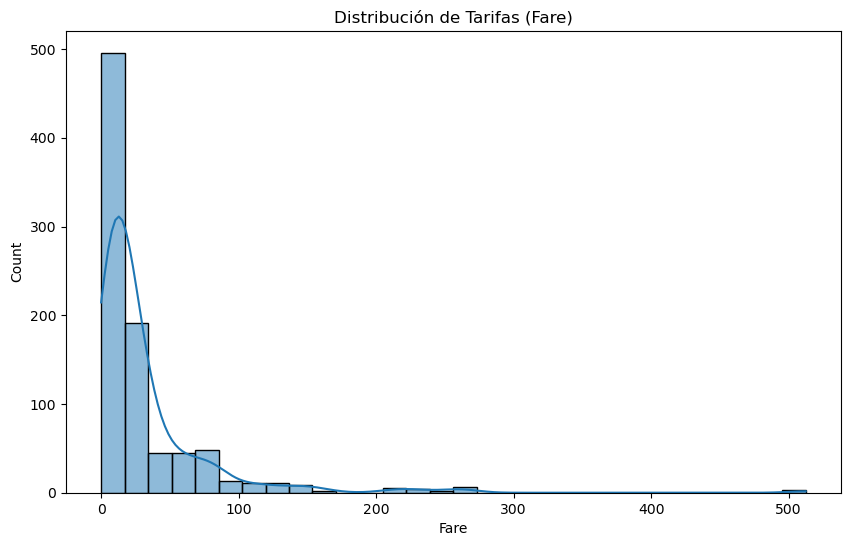

In [12]:
# Distribución de tarifas
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Distribución de Tarifas (Fare)")
plt.show()

<h1>Preprocesar los Datos</h1>

In [15]:
# Paso 2: Manejo de valores nulos

# Imputar valores faltantes en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Eliminar la columna 'Cabin' (demasiados valores nulos)
df.drop('Cabin', axis=1, inplace=True)

# Imputar valores faltantes en 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminar columnas irrelevantes
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [17]:
# Ver la cantidad de valores nulos 
df.isnull().sum()  


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

<h1>Selección de Características</h1>


In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

# Definir variables independientes (X) y dependiente (y)
X = df.drop('Fare', axis=1)  # Usamos 'Fare' como variable objetivo
y = df['Fare']

# Seleccionar características más relevantes
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

# Mostrar las puntuaciones de las características
for i, col in enumerate(X.columns):
    print(f"{col}: {scores[i]}")

Survived: 63.03076422804451
Pclass: 384.5474342090899
Age: 8.389380111163709
SibSp: 23.25189184899009
Parch: 43.60216025779106
Sex_male: 30.571392118542814
Embarked_Q: 12.384654094145185
Embarked_S: 24.015700982524955


<h1>Dividir el Dataset en Train y Test</h1>

In [22]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Train set: (712, 8)
Test set: (179, 8)


<h1>Entrenar el Modelo</h1>

In [25]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar los coeficientes
print(f"Intercepto: {modelo.intercept_}")
for i, col in enumerate(X.columns):
    print(f"Coeficiente para {col}: {modelo.coef_[i]}")

Intercepto: 120.49625934598293
Coeficiente para Survived: 4.052428151563036
Coeficiente para Pclass: -33.25751749964537
Coeficiente para Age: -0.06079393423832847
Coeficiente para SibSp: 5.954037264017031
Coeficiente para Parch: 10.924627408373077
Coeficiente para Sex_male: -1.5181024535155816
Coeficiente para Embarked_Q: -13.818566937763432
Coeficiente para Embarked_S: -20.867363458667437


<h1>Evaluar el Modelo</h1>

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 20.897717925140874
MSE: 932.2520322533333
RMSE: 30.532802561398345
R²: 0.3975480238022159


<h1>Visualización de Resultados</h1>


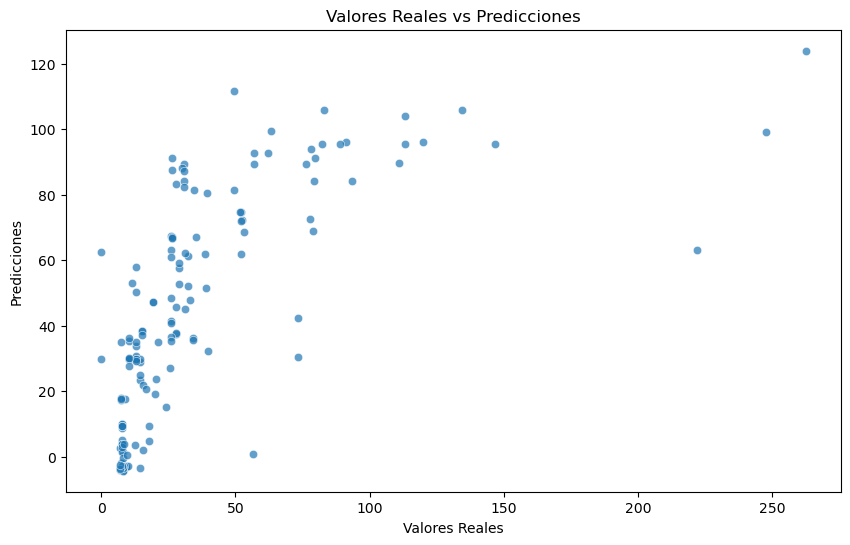

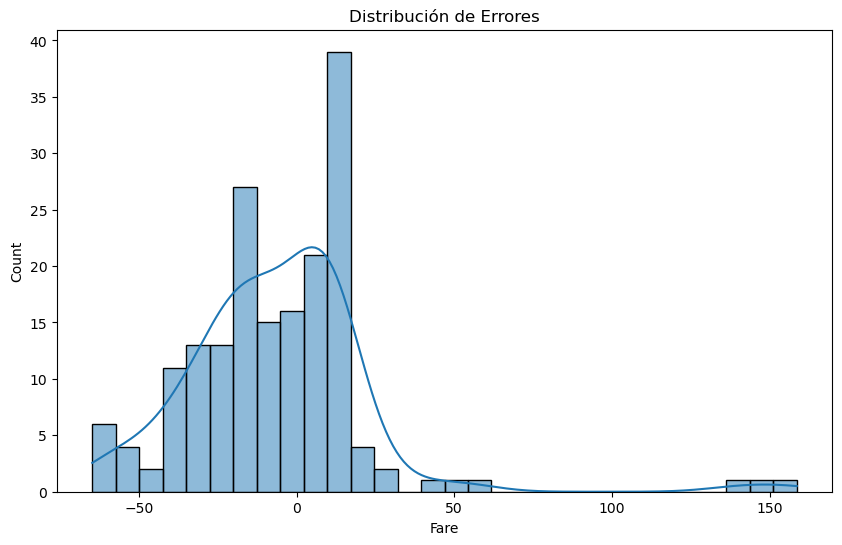

In [30]:
# Comparación de predicciones y valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title("Valores Reales vs Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

# Distribución de errores
errores = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errores, bins=30, kde=True)
plt.title("Distribución de Errores")
plt.show()


<h1>Interpretación y Documentación</h1>

In [ ]:
# Interpretación de los resultados
# - MAE (20.90): En promedio, el modelo comete un error absoluto de 20.90 unidades al predecir la variable objetivo.
# - MSE (932.25): Indica una alta dispersión en los errores.
# - RMSE (30.53): Es la raíz del MSE, indicando que el error promedio del modelo está en el rango de 30.53 unidades, 
# - lo que podría ser alto dependiendo del rango de la variable objetivo.
# - R² (0.40): El modelo explica solo el 40% de la variabilidad en los datos, 
# - lo que sugiere que no captura toda la complejidad de la relación entre las características y la variable objetivo.

# Documentación:
# - La selección de características mostró que variables como Pclass y Sex_male tienen
#   un impacto significativo en la predicción de tarifas.
# - Los gráficos visualizan la relación entre las predicciones y los valores reales,
#   además de mostrar la distribución de los errores, indicando áreas de mejora.
